In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import scikit_posthocs as sp
import sys

from mpl_toolkits.mplot3d import axes3d

In [27]:
AllName="dataG.pkl"
ResizesName="dataM.pkl"
ItersName="dataL.pkl"
matrixIt_Total="data_L_Total.csv"
n_cores=20
repet = 10 #CAMBIAR EL NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

significance_value = 0.05
processes = [2,20,40,80,120,160]

positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

labels = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,1)', '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,1)', '(20,10)',  '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,1)', '(40,10)',  '(40,20)', '(40,80)', '(40,120)','(40,160)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)', '(80,120)','(80,160)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)','(120,160)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

labelsExpand = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,80)', '(40,120)','(40,160)',
            '(80,120)','(80,160)',
            '(120,160)']
labelsShrink = ['(10,1)', 
            '(20,1)', '(20,10)',
            '(40,1)', '(40,10)',  '(40,20)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

#                       WORST        BEST
labels_dist = ['null', 'SpreadFit', 'CompactFit']
                  #0          #1                #2                        #3
labelsMethods = ['Baseline', 'Baseline single','Baseline - Asynchronous','Baseline single - Asynchronous',
                 'Merge','Merge single','Merge - Asynchronous','Merge single - Asynchronous']
                  #4      #5             #6                     #7
    
colors_m = ['green','darkgreen','red','darkred','mediumseagreen','seagreen','palegreen','springgreen','indianred','firebrick','darkgoldenrod','saddlebrown']
linestyle_m = ['-', '--', '-.', ':']
markers_m = ['.','v','s','p', 'h','d','X','P','^']

OrMult_patch = mpatches.Patch(hatch='', facecolor='green', label='Baseline')
OrSing_patch = mpatches.Patch(hatch='', facecolor='springgreen', label='Baseline single')
OrPthMult_patch = mpatches.Patch(hatch='//', facecolor='blue', label='Baseline - Asyncrhonous')
OrPthSing_patch = mpatches.Patch(hatch='\\', facecolor='darkblue', label='Baseline single - Asyncrhonous')
MergeMult_patch = mpatches.Patch(hatch='||', facecolor='red', label='Merge')
MergeSing_patch = mpatches.Patch(hatch='...', facecolor='darkred', label='Merge single')
MergePthMult_patch = mpatches.Patch(hatch='xx', facecolor='yellow', label='Merge - Asyncrhonous')
MergePthSing_patch = mpatches.Patch(hatch='++', facecolor='olive', label='Merge single - Asyncrhonous')

handles_spawn = [OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]

In [28]:
dfG = pd.read_pickle( AllName )

dfG['ADR'] = round((dfG['ADR'] / dfG['DR']) * 100,1)
dfG['SDR'] = round((dfG['SDR'] / dfG['DR']) * 100,1)
       
out_group = dfG.groupby(['Groups', 'ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_total']
group = dfG.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','Groups'])['T_total']

grouped_aggG = group.agg(['median'])
grouped_aggG.rename(columns={'median':'T_total'}, inplace=True) 

out_grouped_G = out_group.agg(['median'])
out_grouped_G.rename(columns={'median':'T_total'}, inplace=True) 

In [29]:
dfM = pd.read_pickle( ResizesName )

dfM['ADR'] = round((dfM['ADR'] / dfM['DR']) * 100,1)
dfM['SDR'] = round((dfM['SDR'] / dfM['DR']) * 100,1)
dfM['T_Redistribution'] = dfM['T_SR'] + dfM['T_AR']
dfM['T_Malleability'] = dfM['T_spawn'] + dfM['T_Redistribution']
       
out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_Redistribution','T_spawn','T_spawn_real','T_SR','T_AR']
group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_Redistribution','T_spawn','T_spawn_real','T_SR','T_AR']

grouped_aggM = group.agg(['median'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

out_grouped_M = out_group.agg(['median'])
out_grouped_M.columns = out_grouped_M.columns.get_level_values(0)

/tmp/ipykernel_4190/462116935.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_Redistribution','T_spawn','T_spawn_real','T_SR','T_AR']
/tmp/ipykernel_4190/462116935.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_Redistribution','T_spawn','T_spawn_real','T_SR','T_AR']


In [30]:
dfL = pd.read_pickle( ItersName )

#Fixme comprobar si hay iters asincronas antes de esto
#dfL['ADR'] = round((dfL['ADR'] / dfL['DR']) * 100,1)
#dfL['SDR'] = round((dfL['SDR'] / dfL['DR']) * 100,1)
dfL['ADR'].fillna(-1, inplace=True)
dfL['SDR'].fillna(-1, inplace=True)
dfL['DR'].fillna(-1, inplace=True)
       
aux_df = dfL[(dfL.Asynch_Iters == True)]
group = aux_df.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_iter']
grouped_aggLAsynch = group.agg(['median','count'])
grouped_aggLAsynch.columns = grouped_aggLAsynch.columns.get_level_values(0)
grouped_aggLAsynch['T_sum'] = grouped_aggLAsynch['count'] * grouped_aggLAsynch['median'] / repet
grouped_aggLAsynch.rename(columns={'median':'T_iter'}, inplace=True) 
group = aux_df.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.median(x,0))
grouped_aggLAsynch['T_stages'] = aux_column

aux_df = dfL[(dfL.Asynch_Iters == False)]
group = aux_df.groupby('NP')['T_iter']
grouped_aggLSynch = group.agg(['median'])
grouped_aggLSynch.rename(columns={'median':'T_iter'}, inplace=True)
group = aux_df.groupby(['NP'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.median(x,0))
grouped_aggLSynch['T_stages'] = aux_column

aux_df2 = aux_df[(aux_df.Is_Dynamic == True)]
group = aux_df2.groupby(['ADR', 'Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','N_Parents'])['T_iter']
grouped_aggLDyn = group.agg(['median'])
grouped_aggLDyn.rename(columns={'median':'T_iter'}, inplace=True)
group = aux_df2.groupby(['ADR', 'Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','N_Parents'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.median(x,0))
grouped_aggLDyn['T_stages'] = aux_column

aux_df2 = aux_df[(aux_df.Is_Dynamic == False)]
group = aux_df2.groupby('NP')['T_iter']
grouped_aggLNDyn = group.agg(['median'])
grouped_aggLNDyn.rename(columns={'median':'T_iter'}, inplace=True)
group = aux_df2.groupby(['NP'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.median(x,0))
grouped_aggLNDyn['T_stages'] = aux_column

/tmp/ipykernel_4190/2495314167.py:17: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  aux_column = group.apply(list).apply(lambda x: np.median(x,0))


In [31]:
from bt_scheme import PartialSolution, BacktrackingSolver
def elegirConf(parameters):
    class StatePS(PartialSolution):
        def __init__(self, config):
            self.config= config
            self.n= len(config) #Indica el valor a añadir

        def is_solution(self):
            return self.n == len(parameters)

        def get_solution(self):
            return tuple(self.config)

        def successors(self):
            array = parameters[self.n]
            for parameter_value in array: #Test all values of the next parameter
                self.config.append(parameter_value)
                yield StatePS(self.config)
                self.config.pop()

    initialPs= StatePS([])
    return BacktrackingSolver().solve(initialPs)


def obtenerConfs(parameters):
    soluciones=[]
    for solucion in elegirConf(parameters):
        soluciones.append(solucion)
    return soluciones

def modifyToGlobal(parameters, len_parameters, configuration):
    usable_configuration = []
    for i in range(len(parameters)):
        if len_parameters[i] > 1:
            aux = (parameters[i][0], configuration[i])
        else:
            aux = (configuration[i])
        usable_configuration.append(aux)
        
    return usable_configuration

def modifyToLocalDynamic(parameters, len_parameters, configuration):
    usable_configuration = []
    for i in range(len(parameters)):
        if len_parameters[i] > 1:
            aux = (configuration[i], -1)
        else:
            aux = (-1)
        usable_configuration.append(aux)
        
    return tuple(usable_configuration)

def CheckConfExists(configuration, dataSet, type_conf='global'):
    exists = False
    config = list(configuration)
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                
                if type_conf == 'global':
                    config.append((np_aux, ns_aux))
                elif type_conf == 'malleability':
                    config.append(np_aux)
                    config.append(ns_aux)
                elif type_conf == 'local':
                    config.append(np_aux)
                    
                if tuple(config) in dataSet.index:     
                    exists = True # FIXME Return here true?
                config.pop()
                
                if type_conf == 'malleability':
                    config.pop()
    return exists

In [32]:
adr = [0,100]
sp_method = [0,1,2]
rd_method = [0,1]
rd_strat  = [1]
parameters = [adr, sp_method, rd_method, rd_strat]
parameters_names = ['ADR', 'Spawn_Method', 'Redistribution_Method', 'Redistribution_Strategy']
len_parameters = [1,2,2,2]
configurations_aux = obtenerConfs(parameters)
configurations = []
configurations_local_dynamic = set()
configurations_local = set()
configurations_simple = []
for checked_conf in configurations_aux:
    aux_conf = modifyToGlobal(parameters, len_parameters, checked_conf)
    if CheckConfExists(aux_conf, grouped_aggG):
        configurations.append(aux_conf)

    if CheckConfExists(checked_conf, grouped_aggM, 'malleability'):
        configurations_simple.append(list(checked_conf))
        
    aux_conf = modifyToLocalDynamic(parameters, len_parameters, checked_conf)
    if CheckConfExists(aux_conf, grouped_aggLDyn, 'local'):
        configurations_local_dynamic.add(aux_conf)

configurations_local_dynamic = list(configurations_local_dynamic)
for index in range(len(configurations_local_dynamic)):
    configurations_local_dynamic[index] = list(configurations_local_dynamic[index])

print(configurations_simple)
print(configurations_local_dynamic)
print(configurations)
print(len(configurations))

[[0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [0, 2, 0, 1], [0, 2, 1, 1], [100, 0, 0, 1], [100, 0, 1, 1], [100, 1, 0, 1], [100, 1, 1, 1], [100, 2, 0, 1], [100, 2, 1, 1]]
[[-1, (1, -1), (1, -1), (1, -1)], [-1, (0, -1), (1, -1), (1, -1)], [-1, (2, -1), (1, -1), (1, -1)], [-1, (0, -1), (0, -1), (1, -1)], [-1, (2, -1), (0, -1), (1, -1)], [-1, (1, -1), (0, -1), (1, -1)]]
[[0, (0, 0), (0, 0), (1, 1)], [0, (0, 0), (0, 1), (1, 1)], [0, (0, 1), (0, 0), (1, 1)], [0, (0, 1), (0, 1), (1, 1)], [0, (0, 2), (0, 0), (1, 1)], [0, (0, 2), (0, 1), (1, 1)], [100, (0, 0), (0, 0), (1, 1)], [100, (0, 0), (0, 1), (1, 1)], [100, (0, 1), (0, 0), (1, 1)], [100, (0, 1), (0, 1), (1, 1)], [100, (0, 2), (0, 0), (1, 1)], [100, (0, 2), (0, 1), (1, 1)]]
12


In [33]:
#ALPHA COMPUTATION
def compute_alpha(config_a, config_b):
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                config_a.append(np_aux)
                config_a.append(ns_aux)
                config_b.append(np_aux)
                config_b.append(ns_aux)
                grouped_aggM.loc[tuple(config_b),'Alpha'] = grouped_aggM.loc[tuple(config_b),'T_Malleability'] / grouped_aggM.loc[tuple(config_a),'T_Malleability']
                #grouped_aggM.loc[tuple(config_b),'Alpha'] = grouped_aggM.loc[tuple(config_b),'T_Redistribution'] / grouped_aggM.loc[tuple(config_a),'T_Redistribution']
                config_a.pop()
                config_a.pop()
                config_b.pop()
                config_b.pop()
                
                
                config_a.insert(0,ns_aux)
                config_a.insert(0,np_aux)
                config_b.insert(0,ns_aux)
                config_b.insert(0,np_aux)
                out_grouped_M.loc[tuple(config_b),'Alpha'] = out_grouped_M.loc[tuple(config_b),'T_Malleability'] / out_grouped_M.loc[tuple(config_a),'T_Malleability']
                #out_grouped_M.loc[tuple(config_b),'Alpha'] = out_grouped_M.loc[tuple(config_b),'T_Redistribution'] / out_grouped_M.loc[tuple(config_a),'T_Redistribution']
                
                config_a.pop(0)
                config_a.pop(0)
                config_b.pop(0)
                config_b.pop(0)

if not ('Alpha' in grouped_aggM.columns):
    for config_a in configurations_simple:
        for config_b in configurations_simple:
            if config_a[1:-1] == config_b[1:-1] and config_a[0] == 0 and config_b[0] != 0:
                compute_alpha(config_a, config_b)
else:
    print("ALPHA already exists")

In [ ]:
#OMEGA COMPUTATION
def compute_omega(config):
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                if len(config) > len(parameters):
                    config.pop()
                    config.pop()
                config.append(np_aux)
                config.append(ns_aux)
                grouped_aggLAsynch.at[tuple(config),'Omega'] = grouped_aggLAsynch.at[tuple(config),'T_iter'] / grouped_aggLSynch.at[np_aux,'T_iter']
                value = grouped_aggLAsynch.at[tuple(config),'T_stages'] / grouped_aggLSynch.at[np_aux,'T_stages']
                grouped_aggLAsynch.at[tuple(config),'Omega_Stages'] = value.astype(object)
                config.pop()
                config.pop()

if not ('Omega' in grouped_aggLAsynch.columns):
    for config in configurations:
        if config[0] != 0:
            compute_omega(config)
else:
    print("OMEGA already exists")

In [34]:
#Dynamic Coherence COMPUTATION
def compute_dyn_coherency(config):
    for np_aux in processes:
        for n_parents_aux in processes:
            if np_aux != n_parents_aux:
                config.append(np_aux)
                config.append(n_parents_aux)
                grouped_aggLDyn.at[tuple(config),'Dyn_Coherency'] = grouped_aggLDyn.at[tuple(config),'T_iter'] / grouped_aggLNDyn.at[np_aux,'T_iter']
                value = grouped_aggLDyn.at[tuple(config),'T_stages'] / grouped_aggLNDyn.at[np_aux,'T_stages']
                grouped_aggLDyn.at[tuple(config),'Dyn_Coherency_Stages'] = value.astype(object)
                config.pop()
                config.pop()

if not ('Dyn_Coherency' in grouped_aggLDyn.columns):
    for config in configurations_local_dynamic:
        compute_dyn_coherency(config)
else:
    print("Dyn_Coherency already exists")

/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1669: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]
/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1669: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]


In [35]:
#Malleability Coherence COMPUTATION
test=dfM[(dfM.Asynch_Iters > 0) & (dfM.Spawn_Strategy == 1)]

for index in range(len(test)):
    time_malleability_aux = test["T_Malleability"].values[index]
    
    total_asynch_iters = int(test["Asynch_Iters"].values[index])
    asynch_iters = test["T_iter"].values[index][-total_asynch_iters:]
    time_iters_aux = np.sum(asynch_iters)
    
    if time_malleability_aux < time_iters_aux:
        
        print(test.iloc[index])
        print(asynch_iters)
        print(time_iters_aux)
        print(time_malleability_aux)
        print("")

In [11]:
out_grouped_G.to_excel("resultG.xlsx") 
out_grouped_M.to_excel("resultM.xlsx") 
#grouped_aggLAsynch.to_excel("AsynchIters.xlsx")
grouped_aggLDyn.to_excel("DynCoherence.xlsx")

In [33]:
grouped_aggM.query('NP==40 and NC==20')

T_Malleability  \
ADR   Spawn_Method Redistribution_Method Redistribution_Strategy NP NC                   
0.0   0            0                     1                       40 20        6.248575   
                   1                     1                       40 20        4.026059   
      1            0                     1                       40 20        0.886124   
                   1                     1                       40 20        0.904058   
      2            0                     1                       40 20        3.957526   
                   1                     1                       40 20        4.102049   
100.0 0            0                     1                       40 20        4.079462   
                   1                     1                       40 20        3.936010   
      1            0                     1                       40 20        0.741423   
                   1                     1                       40 20        0.786713   
      2            0                     1                       40 20        3.938645   
                   1                     1                       40 20        4.171449   

                                                                        T_Redistribution  \
ADR   Spawn_Method Redistribution_Method Redistribution_Strategy NP NC                     
0.0   0            0                     1                       40 20          3.622006   
                   1                     1                       40 20          1.336013   
      1            0                     1                       40 20          0.875293   
                   1                     1                       40 20          0.878103   
      2            0                     1                       40 20          1.369598   
                   1                     1                       40 20          1.420760   
100.0 0            0                     1                       40 20          1.428012   
                   1                     1                       40 20          1.325984   
      1            0                     1                       40 20          0.733503   
                   1                     1                       40 20          0.785067   
      2            0                     1                       40 20          1.359916   
                   1                     1                       40 20          1.339885   

                                                                         T_spawn  \
ADR   Spawn_Method Redistribution_Method Redistribution_Strategy NP NC             
0.0   0            0                     1                       40 20  2.601346   
                   1                     1                       40 20  2.578435   
      1            0                     1                       40 20  0.005517   
                   1                     1                       40 20  0.013576   
      2            0                     1                       40 20  2.593108   
                   1                     1                       40 20  2.683044   
100.0 0            0                     1                       40 20  2.626145   
                   1                     1                       40 20  2.566069   
      1            0                     1                       40 20  0.001866   
                   1                     1                       40 20  0.001818   
      2            0                     1                       40 20  2.578962   
                   1                     1                       40 20  2.880490   

                                                                        T_spawn_real  \
ADR   Spawn_Method Redistribution_Method Redistribution_Strategy NP NC                 
0.0   0            0                     1                       40 20           0.0   
                   1                     1                       40 20           

In [32]:
dataLists = get_df_np_ns_data(dfM, 'T_Redistribution', configurations_simple, 2, 20)
for index in range(len(dataLists)):
    print(index)
    dataLists[index].sort()
    print(dataLists[index])

0
[2.871732, 2.97493, 2.990134, 3.053695, 3.06336, 3.18278, 3.211649, 3.223778, 3.297137, 3.349738]
1
[1.168577, 1.319717, 1.345861, 1.393206, 1.399982, 1.463928, 1.512052, 1.513019, 1.544588, 2.096262]
2
[1.251623, 1.292697, 1.293382, 1.299329, 1.338683, 1.376693, 1.402257, 1.403168, 1.406421, 1.41668]
3
[1.960452, 1.967206, 1.991138, 1.995762, 1.995877, 2.036696, 2.066609, 2.104464, 2.111925, 2.113688]
4
[1.220226, 1.30762, 1.362405, 1.411654, 1.471944, 1.48196, 1.487014, 1.577096, 1.605507, 1.654253]
5
[1.308103, 1.315887, 1.31641, 1.338748, 1.345931, 1.405136, 1.492106, 1.5995, 1.731368, 1.947881]
6
[1.283664, 1.328322, 1.450976, 1.463982, 1.471652, 1.514454, 1.563664, 1.596013, 1.635619, 1.764415]
7
[1.241571, 1.24428, 1.254164, 1.279794, 1.314827, 1.348006, 1.399693, 1.413643, 1.493173, 1.68376]
8
[1.375232, 1.376518, 1.37785, 1.411021, 1.416741, 1.453341, 1.459021, 1.500713, 1.530591, 1.565909]
9
[1.424618, 1.447592, 1.454818, 1.459452, 1.493042, 1.496673, 1.572798, 1.576776, 1.

In [11]:
def create_group_boundary(rms_boundary, np_aux, ns_aux):
    tc_boundary = 0
    boundaries = None
    if rms_boundary != 0:
        # El porcentaje de tc_boundary se tiene en cuenta para eliminar aquellos
        # tiempos demasiado grandes en su malleability time respecto al más pequeño
        boundaries = get_np_ns_data("T_Malleability", grouped_aggM, configurations_simple, np_aux, ns_aux)
        tc_boundary = min(boundaries)
        tc_boundary = tc_boundary + tc_boundary*rms_boundary
    return tc_boundary, boundaries

# Aquellos grupos que tengán valores por encima del límite no se considerarán
def check_groups_boundaries(dataLists, boundaries, tc_boundary):
    for index in range(len(boundaries)):
        if boundaries[index] > tc_boundary:
            dataLists[index] = float('infinity')


In [12]:
def get_perc_differences(dataLists, boundaries, tc_boundary):
    perc = 1.05
    if boundaries != None: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
        check_groups_boundaries(dataLists, boundaries, tc_boundary) 
    indexes = np.argsort(dataLists)
    
    best = -1
    bestMax = -1
    otherBest=[]
    for index in indexes: # Para cada metodo -- Empezando por el tiempo más bajo en media/mediana
        if best == -1:
            best = index
            bestMax = dataLists[best] * perc
        elif dataLists[index] <= bestMax: # Media/Medianas i < Media/Mediana best
            otherBest.append(index)
                
    otherBest.insert(0,best)
    return otherBest

def get_stat_differences(dataLists, df_Res, boundaries, tc_boundary):
    if boundaries != None: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
        check_groups_boundaries(dataLists, boundaries, tc_boundary) 
    indexes = np.argsort(dataLists)
    
    best = -1
    otherBest=[]  
    for index in indexes: # Para cada metodo -- Empezando por el tiempo más bajo en mediana
        if dataLists[index] != float('infinity'):
            if best == -1:
                best = index
            elif not df_Res.iat[best,index]: # df_Res == False indicates 'index' and 'best' have the same mean/median
                otherBest.append(index)
                
    otherBest.insert(0,best)
    return otherBest

In [13]:
grouped_np = ["T_total"]
separated_np = ["T_Malleability", "T_Redistribution", "T_spawn", "T_SR", "T_AR", "Alpha", "Omega", "count"]

def get_np_ns_data(tipo, data_aux, used_config, np_aux, ns_aux):
    dataLists=[]
    for config in used_config:
        if tipo in grouped_np:
            config.append((np_aux,ns_aux))
        elif tipo in separated_np:
            config.append(np_aux)
            config.append(ns_aux)
        
        if tuple(config) in data_aux.index:
            aux_value = data_aux.loc[tuple(config),tipo]
            if isinstance(aux_value, pd.Series):
                aux_value = aux_value.values[0]
            if aux_value == 0: #Values of zero indicate it was not performed
                aux_value = float('infinity')
        else: # This configuration is not present in the dataset
            aux_value = float('infinity')
        dataLists.append(aux_value)
        config.pop()
        if tipo in separated_np:
            config.pop()
    return dataLists

def get_config_data(tipo, data_aux, config):
    dataLists=[]
    procsLists=[]
    for ns_aux in processes:
        for np_aux in processes:
            if np_aux != ns_aux:
                
                if tipo in grouped_np:
                    config.append((np_aux,ns_aux))
                elif tipo in separated_np:
                    config.append(np_aux)
                    config.append(ns_aux)
                if tuple(config) in data_aux.index:
                    procsLists.append((np_aux,ns_aux))
                    aux_value = data_aux.loc[tuple(config),tipo]
                    if isinstance(aux_value, pd.Series):
                        aux_value = aux_value.values[0]
                    if aux_value == 0: #Values of zero indicate it was not performed
                        aux_value = float('infinity')
                else: # This configuration is not present in the dataset
                    aux_value = float('infinity')
                dataLists.append(aux_value)
                config.pop()
                if tipo in separated_np:
                    config.pop()
    return dataLists, procsLists

def get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux):
    dataLists=[]
    if tipo in grouped_np:
        tuple_data = (np_aux, ns_aux)
        df_npns_aux = df_check.loc[(df_check['Groups']==tuple_data)]
    elif tipo in separated_np:
        df_npns_aux = df_check.loc[(df_check['NP']==np_aux)]
        df_npns_aux = df_npns_aux.loc[(df_npns_aux['NC']==ns_aux)]
        
    for config in used_config:
        df_config_aux = df_npns_aux
        for index in range(len(config)):
            aux_name = parameters_names[index]
            aux_value = config[index]
            df_config_aux = df_config_aux.loc[(df_config_aux[aux_name] == aux_value)]
                
        aux_value = list(df_config_aux[tipo])
        if len(aux_value) > 0:
            dataLists.append(aux_value)
    return dataLists

def get_df_config_data(df_check, tipo, config):
    dataLists=[]
    df_config_aux = df_check
    for index in range(len(config)):
        aux_name = parameters_names[index]
        aux_value = config[index]
        df_config_aux = df_config_aux.loc[(df_config_aux[aux_name] == aux_value)]
        
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                if tipo in grouped_np:
                    tuple_data = (np_aux, ns_aux)
                    df_aux = df_config_aux.loc[(df_config_aux['Groups']==tuple_data)]
                elif tipo in separated_np:
                    df_aux = df_config_aux.loc[(df_config_aux['NP']==np_aux)]
                    df_aux = df_aux.loc[(df_aux['NC']==ns_aux)]
                aux_value = list(df_aux[tipo])
                if len(aux_value) > 0:
                    dataLists.append(aux_value)
    return dataLists
                
                

In [14]:
def check_normality(df_check, tipo, used_config, fast=True):
    normality_array=[True] * (len(processes) * (len(processes)-1) * len(used_config))
    normality = True
    total=0
    i=-1
    #Comprobar para cada configuración si se sigue una distribución normal/gaussiana
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                i+=1
                dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
                for data_aux in dataLists:
                    st,p = stats.shapiro(data_aux) # Tendrían que ser al menos 20 datos y menos de 50
                    if p < significance_value: # Reject H0
                        if fast:
                            return False
                        normality_array[i] = False
                        normality = False
                        total+=1
    print("Se sigue una distribución guassiana: " + str(normality) + "\nUn total de: " + str(total) + " no siguen una gaussiana")
    print(normality_array)
    return normality

def check_homoscedasticity(df_check, tipo, used_config, fast=True):
    homoscedasticity_array=[True] * (len(processes) * (len(processes)-1))
    homoscedasticity = True
    total=0
    i=-1
    #Comprobar para cada configuración es homoestatica
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                i+=1
                dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
                st,p = stats.levene(*dataLists) # Tendrían que ser al menos 20 datos y menos de 50
                if p < significance_value: # Reject H0
                    if fast:
                        return False
                    homoscedasticity_array[i] = False
                    homoscedasticity = False
                    total+=1
    print("Se sigue una distribución de datos Homocedastica: " + str(homoscedasticity) + "\nUn total de: " + str(total) + " no siguen una homocedastica")
    print(homoscedasticity_array)
    return homoscedasticity

def compute_global_stat_difference(dataLists, parametric, np_aux, ns_aux):
    if parametric:
        st,p=stats.f_oneway(*dataLists)
    else:
        st,p=stats.kruskal(*dataLists)
    if p > significance_value:
        print("For NP " + str(np_aux) + " and " + str(ns_aux) + " is accepted H0")
        return True # Equal values || Accept H0
    return False # Some groups are different || Reject H0

def compute_global_posthoc(dataLists, parametric): #TODO Comprobar CDF de los grupos
    data_stats=[]
    data_stats2=[]
    ini=0
    end=len(dataLists)
    if parametric:
        df_aux = sp.posthoc_ttest(dataLists)
        df_Res = df_aux.copy()
        for i in range(ini,end):
            data_stats.append(np.mean(dataLists[i]))
            
            for j in range(ini,end):
                if df_Res.iat[i,j] < significance_value: # Different means || Reject H0
                    df_Res.iat[i, j] = True
                else:
                    df_Res.iat[i, j] = False
    else:
        df_aux = sp.posthoc_conover(dataLists)
        df_Res = df_aux.copy()
        for i in range(ini,end):
            data_stats.append(np.median(dataLists[i]))
            #data_stats2.append(stats.iqr(dataLists[i],axis=0))
            for j in range(ini,end):
                if df_Res.iat[i,j] < significance_value: # Different medians || Reject H0
                    df_Res.iat[i, j] = True # Not equal medians
                else:
                    df_Res.iat[i, j] = False # Equal medians
    #print(df_Res)
    #print(df_aux)
    #print(data_stats)
    #print(data_stats2)
    #aux_value = min(data_stats)
    #print(data_stats.index(aux_value))
    return df_Res, data_stats

In [15]:
def results_with_perc(tipo, data_aux, used_config, rms_boundary=0):
    results = []
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                tc_boundary, boundaries = create_group_boundary(rms_boundary, np_aux, ns_aux)
                
                #Get all values for particular config with these number of processes
                dataLists = get_np_ns_data(tipo, data_aux, used_config, np_aux, ns_aux)

                aux_data = get_perc_differences(dataLists, boundaries, tc_boundary)
                results.append(aux_data)
    return results

def results_with_stats(tipo, df_check, used_config, rms_boundary=0):
    results = []
    use_parametric = check_normality(df_check, tipo, used_config)
    if use_parametric:
        use_parametric = check_homoscedasticity(df_check, tipo, used_config)
    print("Se usan tests parametricos: "+str(use_parametric))
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                tc_boundary, boundaries = create_group_boundary(rms_boundary, np_aux, ns_aux)
                
                #Get all values for particular config with these number of processes
                dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
                equal_set = compute_global_stat_difference(dataLists, use_parametric, np_aux, ns_aux)
                if equal_set:
                    aux_data = list(range(len(used_config))) # All data is equal
                else:
                    res_aux, times_aux = compute_global_posthoc(dataLists, use_parametric)
                    aux_data = get_stat_differences(times_aux, res_aux, boundaries, tc_boundary)
                
                results.append(aux_data)
    
    return results

In [36]:
checked_type='T_Redistribution'
use_perc = False
select_first_winner = False
prefer_first_winner = False
rms_boundary=0 # Poner a 0 para perspectiva de app. Valor >0 y <1 para perspectiva de RMS
if checked_type=='T_total':
    tipo="T_total"
    if use_perc:
        data_aux = grouped_aggG
    else:
        data_aux = dfG
    used_config = configurations
elif checked_type=='T_Malleability' or checked_type=='T_spawn' or checked_type=='T_SR' or checked_type=='T_AR' or checked_type=='T_Redistribution':
    tipo=checked_type
    
    if use_perc:
        data_aux = grouped_aggM
    else:
        data_aux = dfM
        if tipo == 'T_AR':
            data_aux = data_aux[(data_aux.ADR > 0)]
        elif tipo == 'T_SR':
            data_aux = data_aux[(data_aux.ADR == 0)]
        
    used_config = configurations_simple
    
if use_perc:
    results = results_with_perc(tipo, data_aux, used_config, rms_boundary)
else:
    results = results_with_stats(tipo, data_aux, used_config, rms_boundary)
    
if not use_perc and tipo == 'T_AR': #FIXME!!!! No tiene en cuenta total de configuraciones sincronos
    for res_index in range(len(results)):
        for inner_index in range(len(results[res_index])):
            results[res_index][inner_index]+=4

#Results is a 2 dimensional array. First dimension indicates lists of winners of a particulal number of processes (NP->NC). 
#Second dimension is an ordered preference of indexes in the array configurations.
print(results)
print(len(results))

Se usan tests parametricos: False
[[11, 7, 2, 5, 1, 8, 10, 4], [10, 2, 9, 8, 5], [9, 8, 2], [9, 8], [8, 9], [9, 8, 2], [9, 2, 3], [3, 9], [3, 9], [9, 3], [9, 8], [8, 9], [9, 3, 2], [9, 8, 3, 2], [9, 3, 8, 2], [9, 8], [9], [9, 8, 2], [9, 8], [8, 2, 3, 9], [9, 8], [9], [9, 8, 3], [9, 8], [9, 8], [9, 8, 2], [9, 2], [9, 8, 3], [9, 8, 2], [8, 9, 2, 3]]
30


In [37]:
#Lista de indices de mayor a menor según el total de ocurrencias
aux_array = []
for data in results:
    aux_array+=data
aux_keys, aux_counts = np.unique(aux_array, return_counts=True)
aux_ordered_index=list(reversed(np.argsort(aux_counts)))

#Lista de indices de mayor a menor según el total de ocurrencias del primero de cada grupo
aux_array = [0] * len(results)
for index in range(len(results)):
    aux_array[index] = results[index][0]
aux_keys_best, aux_counts_best = np.unique(aux_array, return_counts = True)
aux_ordered_best_index=list(reversed(np.argsort(aux_counts_best)))

def heatmap_get_best(index, ordered_array, keys_array, counts_array, prefer_winner=False):
    valid_candidates_indexes = []
    prev_counts = -1
    for tested_index in ordered_array:
        if keys_array[tested_index] in results[index]:
            if counts_array[tested_index] >= prev_counts:
                prev_counts = counts_array[tested_index]
                valid_candidates_indexes.append(tested_index)
            else:
                break
                
    if prefer_winner: # Si esta activo, en caso de empate en ocurrencias se selecciona el menor tiempo
        for tested_index in results[index]:
            if tested_index in valid_candidates_indexes:
                return tested_index
    return min(valid_candidates_indexes) # En caso de empate se devuelve el que tiene menor valor (Suele ser la config más simple)

i=0
j=0
used_aux=0
heatmap=np.zeros((len(processes),len(processes))).astype(int)

if select_first_winner:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) + j - used_aux
                heatmap[i][j] = results[results_index][0]
else:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) + j - used_aux
                index = heatmap_get_best(results_index, aux_ordered_index, aux_keys, aux_counts, prefer_first_winner)
                heatmap[i][j]=aux_keys[index]
                #index = heatmap_get_best(results_index, aux_ordered_best_index, aux_keys_best, aux_counts_best, prefer_first_winner)
                #heatmap[i][j]=aux_keys_best[index]
heatmap[-1][-1]=len(used_config)
print(aux_keys)
print(aux_counts)
print(heatmap)

[ 1  2  3  4  5  7  8  9 10 11]
[ 1 14 11  1  2  1 22 29  2  1]
[[-1  8  9  9  9  9]
 [ 9 -1  9  9  9  9]
 [ 9  9 -1  9  9  9]
 [ 9  9  9 -1  9  9]
 [ 9  9  9  9 -1  9]
 [ 9  9  9  9  9 12]]


In [38]:
#Adapta results a una cadena asegurando que cada cadena no se sale de su celda
def get_heatmap_multiple_strings(results): #FIXME Deprecated
    results_str = []
    max_counts = 1
    max_per_line = 3
    for i in range(len(results)):
        results_str.append(list())
        count = len(results[i])
        results_aux = results[i]
        if count > max_counts:
            count = max_counts
            results_aux = results[i][:count]
        
        remainder = count%max_per_line
        if count <= max_per_line:
            aux_str = str(results_aux).replace('[','').replace(']','')
            results_str[i].append(aux_str)
        else:
            if remainder == 0:
                index = count//2
            else:
                index = count - ((remainder-1)*max_per_line + 1)
            aux_str = str(results_aux[:index]).replace('[','').replace(']','')
            results_str[i].append(aux_str)
            aux_str = str(results_aux[index:]).replace('[','').replace(']','')
            results_str[i].append(aux_str)
    return results_str

def get_heatmap_strings(heatmap):
    results_str = []
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i!=j:
                results_str.append(list())
                results_str[-1].append(heatmap[i][j])
    return results_str

/tmp/ipykernel_4190/3398103933.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+processes, fontsize=36)
/tmp/ipykernel_4190/3398103933.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+processes, fontsize=36)


Filename: Heatmap_T_Redistribution.png


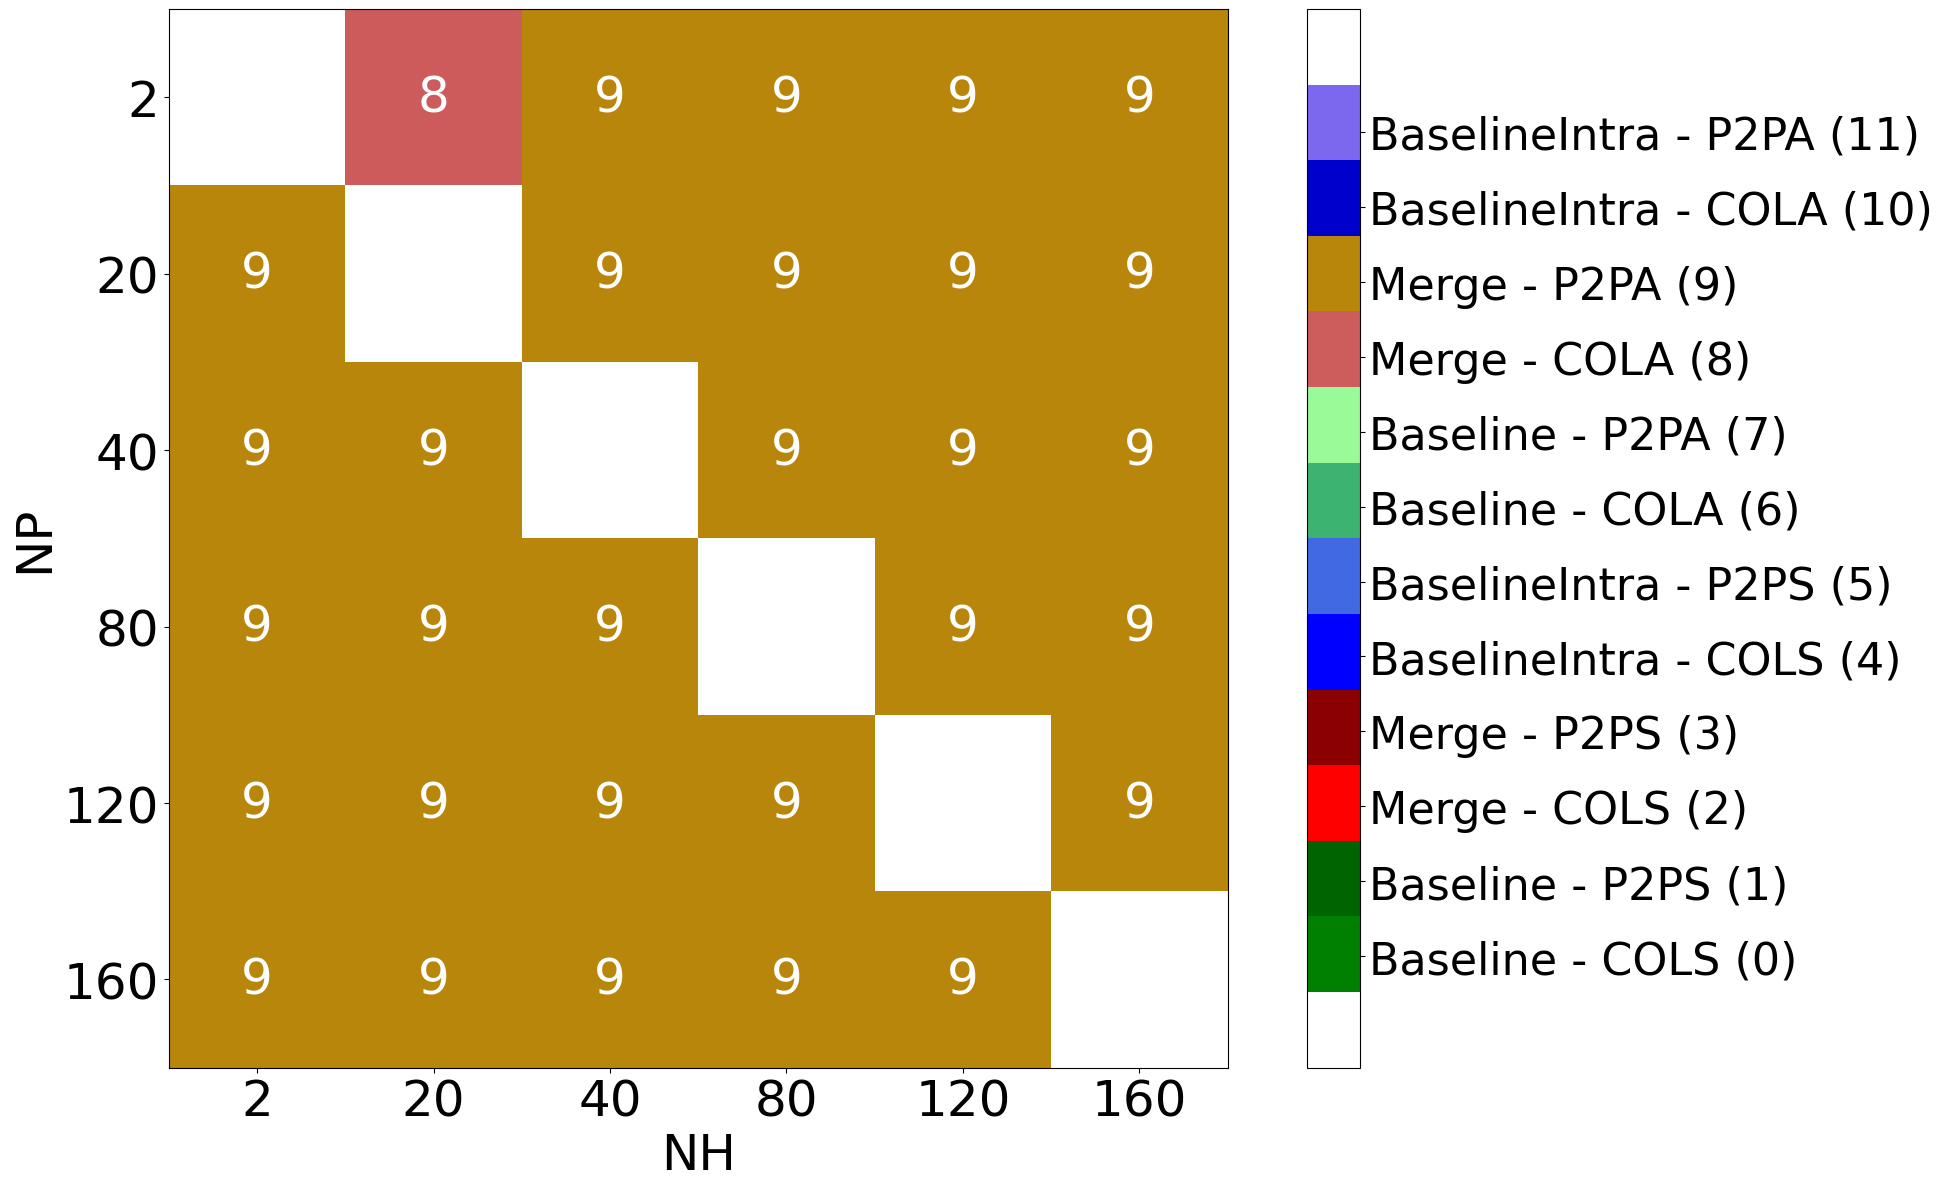

In [45]:
#Crea un heatmap teniendo en cuenta los colores anteriores
f=plt.figure(figsize=(24, 12))
ax=f.add_subplot(111)

myColors = (colors.to_rgba("white"), 
    colors.to_rgba("green"), #BAllS
    colors.to_rgba("darkgreen"), #BP2PS
    colors.to_rgba("red"), #MAllS
    colors.to_rgba("darkred"),  #MP2PS
    colors.to_rgba("blue"),  #BIntraAllS
    colors.to_rgba("royalblue"), #BIntraP2PS
    colors.to_rgba("mediumseagreen"), #BAllA
    #colors.to_rgba("seagreen"),  #BAllT
    colors.to_rgba("palegreen"), #BP2PA
    #colors.to_rgba("springgreen"), #BP2PT
    colors.to_rgba("indianred"), #MAllA 
    #colors.to_rgba("firebrick"), #MAllT
    colors.to_rgba("darkgoldenrod"), #MP2PA
    #colors.to_rgba("saddlebrown"), #MP2PT
    colors.to_rgba("mediumblue"),  #BIntraAllA
    colors.to_rgba("mediumslateblue"), #BIntraP2PA
    colors.to_rgba("white"))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

im = ax.imshow(heatmap,cmap=cmap,interpolation='nearest')

# Loop over data dimensions and create text annotations.
used_aux=0
results_str = get_heatmap_strings(heatmap)
for i in range(len(processes)):
    for j in range(len(processes)):
        if i!=j:
            aux_color="white"
            if 0 <= heatmap[i, j] <= 1 or 4 <= heatmap[i, j] <= 7: # El 1 puede necesitar texto en negro
                aux_color="black"
            results_index = i*len(processes) +j-used_aux
            if len(results_str[results_index]) == 1:
                text = results_str[results_index][0]
                ax.text(j, i, text, ha="center", va="center", color=aux_color, fontsize=36)
            else:
                add_aux = 0.33
                for line in range(len(results_str[results_index])):
                    i_range = i - 0.5 + add_aux
                    ax.text(j, i_range, results_str[results_index][line],
                            ha="center", va="center", color=aux_color, fontsize=36)
                    add_aux+=0.33
        else:
            used_aux+=1

ax.set_ylabel("NP", fontsize=36)
ax.set_xlabel("NH", fontsize=36)

ax.set_xticklabels(['']+processes, fontsize=36)
ax.set_yticklabels(['']+processes, fontsize=36)


labelsMethods_aux = ['Baseline - COLS (0)', 'Baseline - P2PS (1)',
                    'Merge - COLS (2)','Merge - P2PS (3)',
                    'Baseline - COLA (4)', 'Baseline - COLT (5)','Baseline - P2PA (6)','Baseline - P2PT (7)',
                    'Merge - COLA (8)','Merge - COLT (9)','Merge - P2PA (10)','Merge - P2PT (11)']
labelsMethods_aux = ['Baseline - COLS (0)', 'Baseline - P2PS (1)',
                    'Merge - COLS (2)','Merge - P2PS (3)',
                    'BaselineIntra - COLS (4)', 'BaselineIntra - P2PS (5)',
                    'Baseline - COLA (6)', 'Baseline - P2PA (7)',
                    'Merge - COLA (8)','Merge - P2PA (9)',
                    'BaselineIntra - COLA (10)', 'BaselineIntra - P2PA (11)']

colorbar=f.colorbar(im, ax=ax)
tick_bar = []
for i in range(len(used_config)):
    tick_bar.append(0.37 + i*0.92) #Config de 12 valores
    #tick_bar.append(0.35 + i*0.89) #Config de 8 valores
colorbar.set_ticks(tick_bar) 
colorbar.set_ticklabels(labelsMethods_aux)
colorbar.ax.tick_params(labelsize=32)
#

f.tight_layout()
print("Filename: Heatmap_"+tipo+".png")
f.savefig("Images/Heatmap_"+tipo+".png", format="png")

In [20]:
aux_array = [] #Counts all
for data in results:
    aux_array+=data
aux_results, aux_counts = np.unique(aux_array, return_counts=True)
print(aux_results)
print(aux_counts)

aux_array = [0] * len(results) # Counts ganador celda
for index in range(len(results)):
    aux_array[index] = results[index][0]
aux_results, aux_counts = np.unique(aux_array, return_counts = True)
print(aux_results)
print(aux_counts)


[ 1  2  3  4  5  7  8  9 10 11]
[ 3 11 22  5  5  5 21 27  1  3]
[ 2  3  4  5  8  9 10 11]
[ 5 13  1  1  2  6  1  1]


In [20]:
def normalize_arrays(arrays, norm_array):
    new_arrays = arrays.copy()
    for index in range(len(new_arrays)):
        new_arrays[index] = np.divide(norm_array, new_arrays[index])
    return new_arrays

def create_labels_lineplot(used_direction, user_condition=lambda a, b: True):
    labels_aux = []
    if used_direction == 's':
        for ns_aux in processes:
            for np_aux in processes:
                if used_direction=='s' and np_aux > ns_aux and np_aux != ns_aux and user_condition(np_aux, ns_aux):
                    new_label = "(" + str(np_aux) + "," + str(ns_aux) + ")"
                    labels_aux.append(new_label)
    else:
        for np_aux in processes:
            for ns_aux in processes:
                if ((used_direction=='e' and np_aux < ns_aux) or used_direction=='a') and np_aux != ns_aux and user_condition(np_aux, ns_aux):
                    new_label = "(" + str(np_aux) + "," + str(ns_aux) + ")"
                    labels_aux.append(new_label)
    return labels_aux

def reorder_data(plot_data, actual_order, expected_order):
    ordered_indexes = []
    len_order = len(actual_order)
    for index in range(len_order):
        actual_order[index] = str(actual_order[index]).replace(" ", "")
    for index in range(len_order):
        ordered_indexes.append(actual_order.index(expected_order[index]))

    for index in range(len(plot_data)):
        old_array = plot_data[index]
        new_array = []
        for i in ordered_indexes:
            new_array.append(old_array[i])
        plot_data[index] = new_array

    return plot_data

[0.6319885595853629, 0.6647206731084309, 0.5654198150315378, 0.5192361064164298, 0.4973842642021358, 0.6069666573265923, 0.6131397828204103, 0.6640041760203946, 0.661194251289581, 0.592526172813267, 0.594908682818867, 0.6287463792475801, 0.46046893648274684, 0.547386113571696, 0.3727344416117256]
[0.9470698092447118, 0.9705203582798001, 0.9778568004789084, 1.0031986747938926, 1.0030917172709444, 0.9916503665318055, 1.0178297523119726, 1.0007429787211934, 0.9994634856055595, 0.9718688566538206, 1.013131807643475, 1.0171890661748337, 1.0139912116698058, 1.029961116563998, 0.9804101444380738]
[1.0369126602168155, 0.9879444653714484, 0.9985985672658163, 0.9166239075931912, 0.9478401263693728, 0.9423947585516667, 1.040970430395608, 0.9425308940344218, 0.9869228625773857, 1.0438414632704085, 0.9922458168143874, 0.9831711301818349, 1.0200280371732278, 0.9056135533637942, 0.9212709001947372]
[0.828852870060541, 0.8998537922340346, 0.9123838020863362, 0.9357520800731317, 0.9768953090592928, 1.0

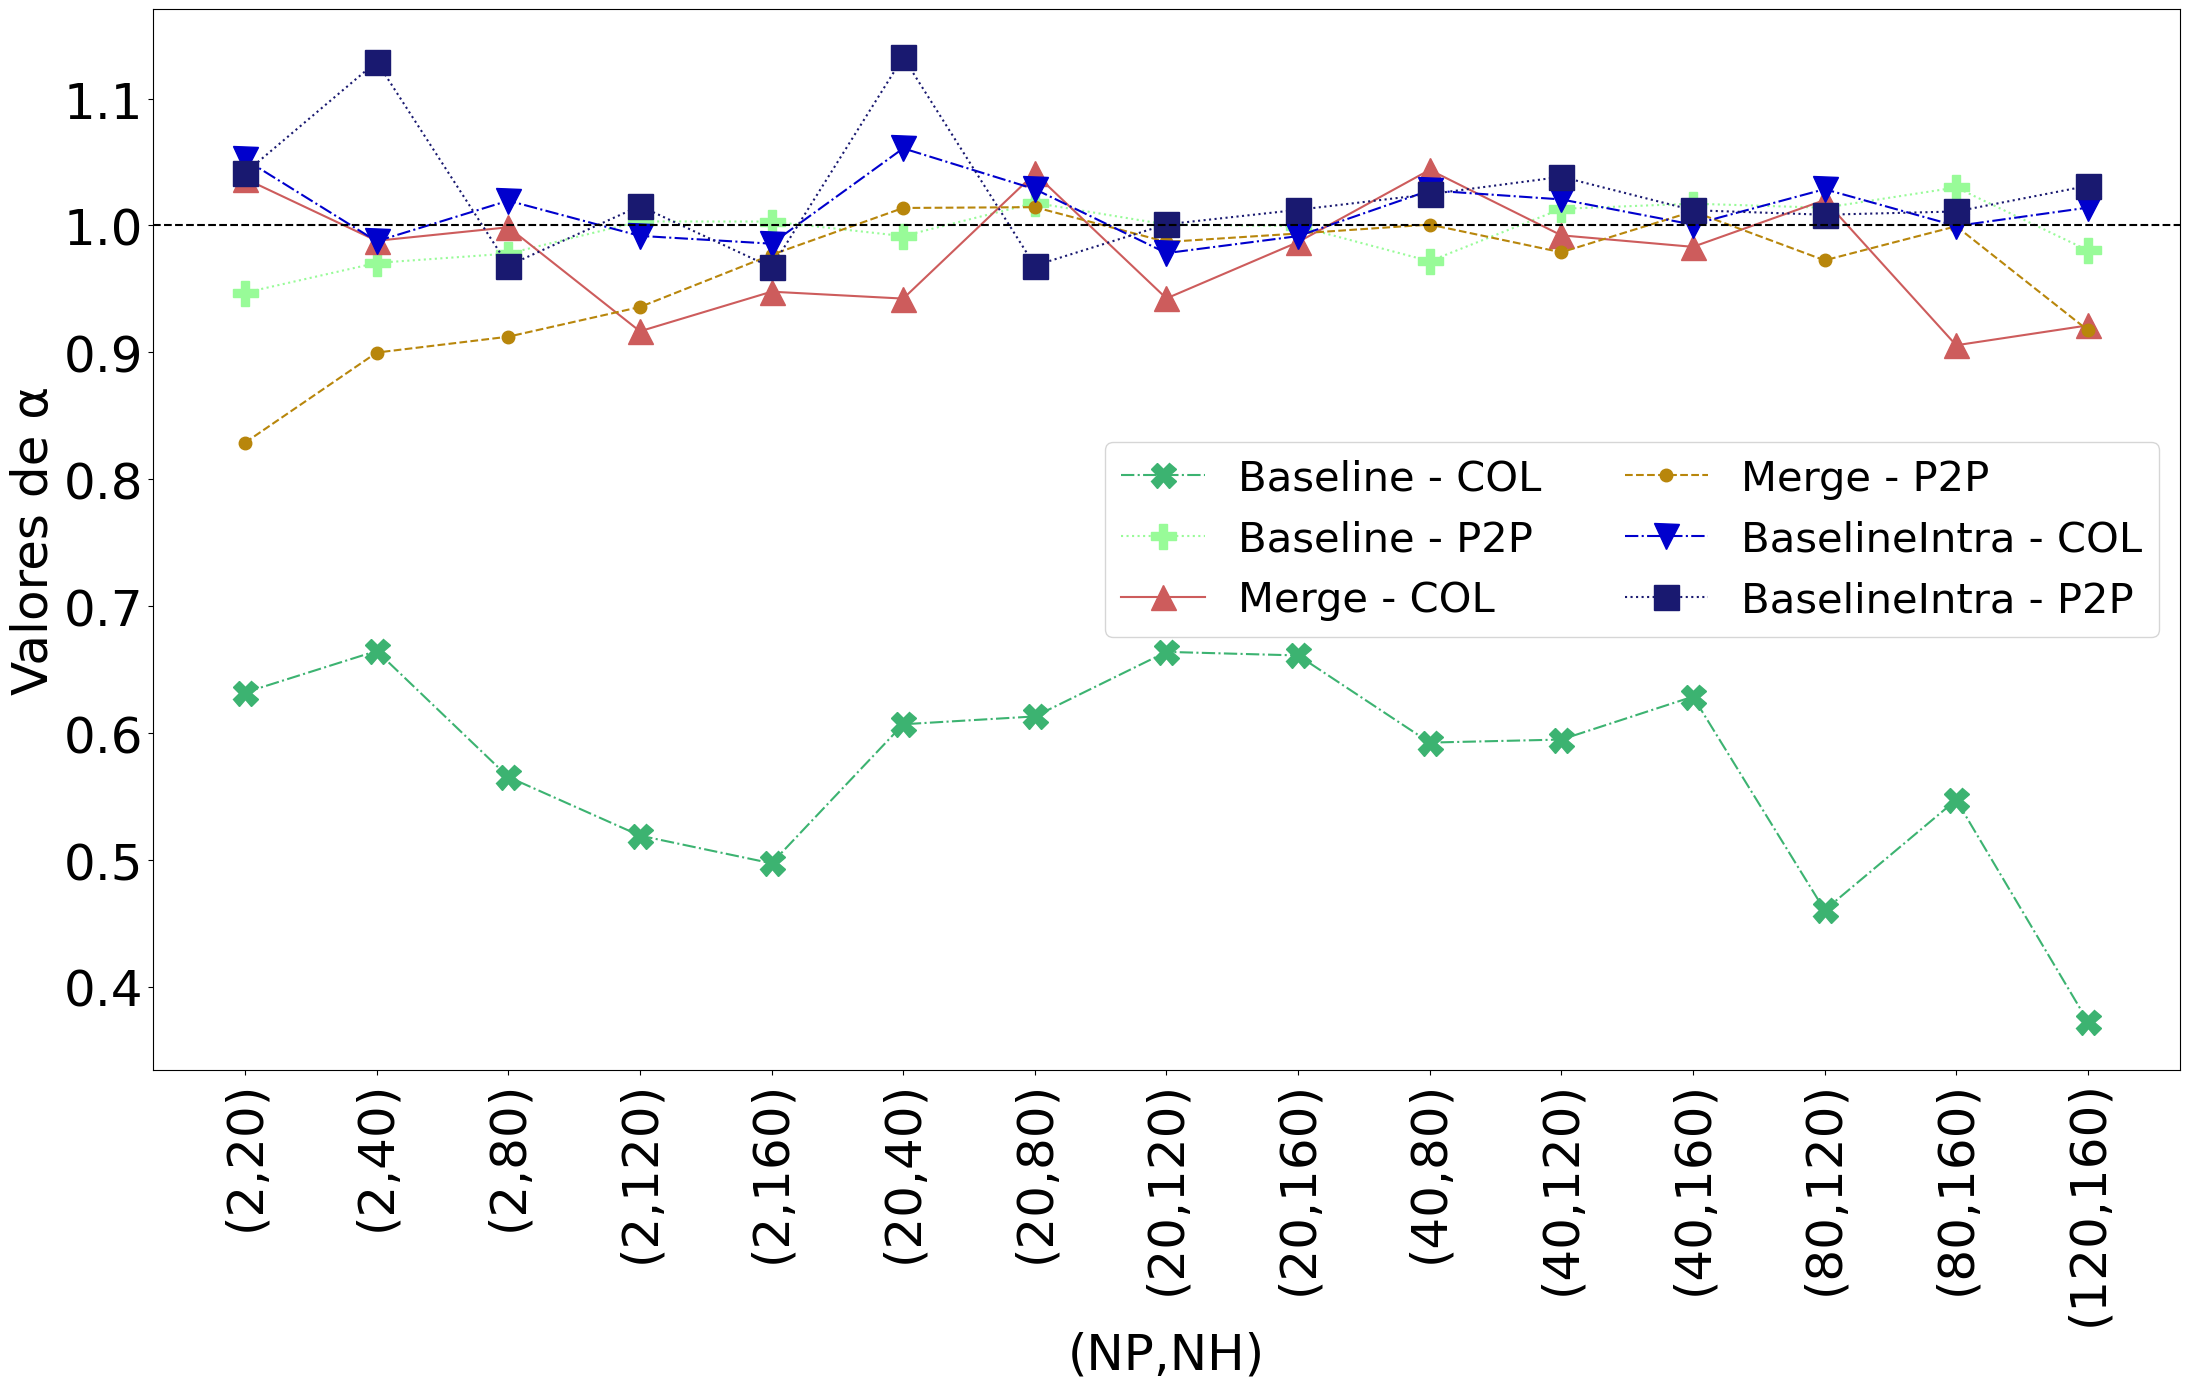

In [43]:
used_direction='e'
test_parameter='alpha' #Valores son "alpha" o "omega"

if test_parameter == 'alpha':
    name_fig="Alpha_"
    real_parameter='Alpha'
    name_legend = "Valores de α"
    normalize = True
    allow_all = False
    used_config = configurations_simple
    data_aux = grouped_aggM[grouped_aggM[real_parameter] > 0]
elif test_parameter == 'T_Malleability':
    name_fig="Malleability_"
    real_parameter='T_Malleability'
    name_legend = "Time(s)"
    normalize = False
    allow_all = True
    used_config = configurations_simple
    data_aux = grouped_aggM
elif test_parameter == 'T_Redistribution':
    name_fig="Redistribution_"
    real_parameter='T_Redistribution'
    name_legend = "Tiempo(s)"
    normalize = False
    allow_all = True
    used_config = configurations_simple
    data_aux = grouped_aggM
elif test_parameter == 'omega':
    name_fig="Omega_"
    real_parameter='Omega'
    name_legend = "Values of ω"
    normalize = True
    allow_all = False
    used_config = configurations
    data_aux = grouped_aggLAsynch[grouped_aggLAsynch[real_parameter] > 0]
elif test_parameter == 'iters_count':
    name_fig="Iters_"
    real_parameter='count'
    name_legend = "Asynchronous iterations"
    normalize = False
    allow_all = True
    used_config = configurations
    data_aux = grouped_aggLAsynch[grouped_aggLAsynch[real_parameter] > 0]
    
if used_direction=='s':
    data_aux=data_aux.query('NP > NC')
    name_fig= name_fig+"Shrink"
elif used_direction=='e':
    data_aux=data_aux.query('NP < NC')
    name_fig= name_fig+"Expand"
elif used_direction=='a':
    name_fig= name_fig+"All"   
#data_aux=data_aux.query('NP == 160 or NC == 160')

plot_data = []
for config in used_config:
    if config[0] > 0 or allow_all:
        dataLists,procsLists = get_config_data(real_parameter, data_aux, config)
        dataLists = list(filter(lambda x: x != float('infinity'), dataLists))
        plot_data.append(dataLists)
    
#labels_aux = create_labels_lineplot(used_direction, lambda a, b: a == 160 or b == 160)
labels_aux = create_labels_lineplot(used_direction)
plot_data = reorder_data(plot_data, procsLists, labels_aux)
    
labelsMethods_aux = ['Baseline - COL', 'Baseline - P2P',
                    'Merge - COL','Merge - P2P',
                    'BaselineIntra - COL', 'BaselineIntra - P2P']
#labelsMethods_aux = ['Baseline - COLS', 'Baseline - P2PS',
#                    'Merge - COLS','Merge - P2PS',
#                    'BaselineIntra - COLS', 'BaselineIntra - P2PS',
#                    'Baseline - COLA', 'Baseline - P2PA',
#                    'Merge - COLA','Merge - P2PA',
#                    'BaselineIntra - COLA', 'BaselineIntra - P2PA']
colors_m = ['green','darkgreen','red','darkred', 'blue', 'royalblue', 'mediumseagreen','palegreen','indianred','darkgoldenrod','mediumblue', 'midnightblue']

f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)
x = np.arange(len(labels_aux))
for index in range(len(plot_data)):
    array_aux = plot_data[index]
    plot_index = index
    if real_parameter == 'Alpha' or real_parameter == 'Omega' or real_parameter == 'count': #FIXME This line is a lie...
        plot_index = 6 + index #FIXME This line is a lie...
    print(array_aux)
    ax.plot(x, array_aux, color=colors_m[plot_index%len(colors_m)], linestyle=linestyle_m[plot_index%len(linestyle_m)], \
        marker=markers_m[plot_index%len(markers_m)], markersize=18, label=labelsMethods_aux[index])

ax.set_xlabel("(NP,NH)", fontsize=36)
ax.set_ylabel(name_legend, fontsize=36)
if normalize:
    ax.axhline(y=1, color='black', linestyle='--')
plt.xticks(x, labels_aux,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)
        
f.tight_layout()
f.savefig("Images/LinePlot_"+name_fig+".png", format="png")

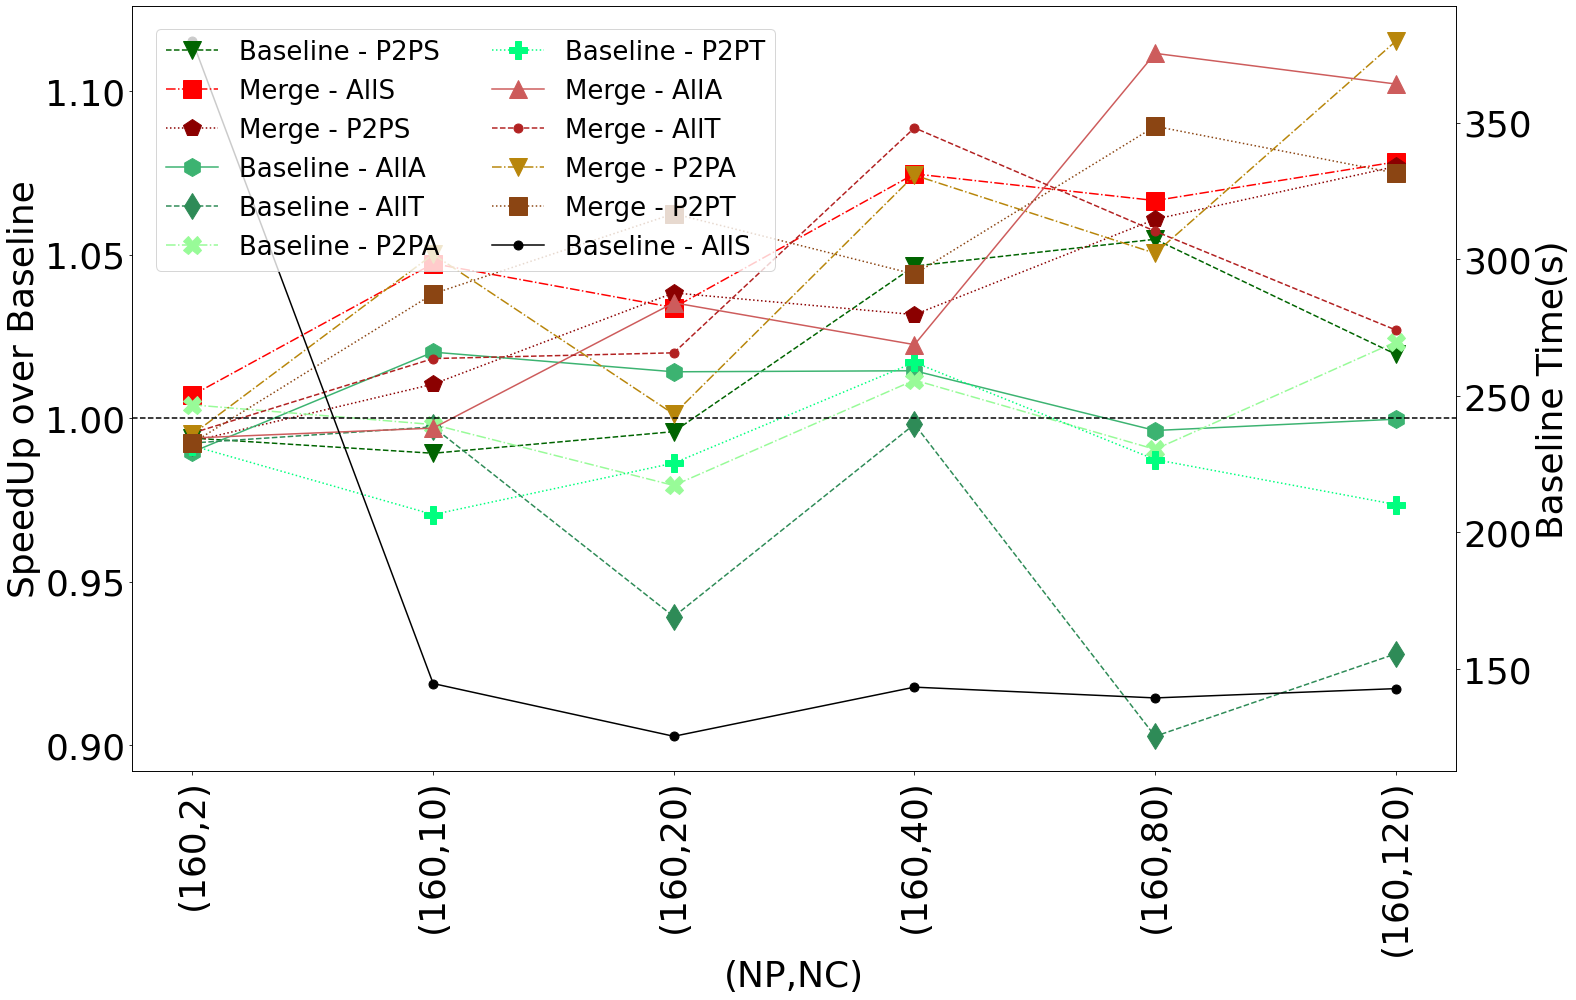

In [22]:
used_direction='s'
test_parameter='T_total' #Valores son "alpha" o "omega"
intranode=False

if test_parameter == 'T_total':
    name_fig="Ttotal"
    real_parameter='T_total'
    name_legend = "Time(s)"
    used_config = configurations
    data_aux = grouped_aggG
    #data_aux = data_aux[data_aux.index.isin(df1.index)]
    
if used_direction=='s':
    data_aux_cmp=grouped_aggM.reset_index().query('NP > NC')
    name_fig= name_fig+"Shrink"
elif used_direction=='e':
    data_aux_cmp=grouped_aggM.reset_index().query('NP < NC')
    name_fig= name_fig+"Expand"
elif used_direction=='a':
    data_aux_cmp=grouped_aggM.reset_index()
    name_fig= name_fig+"All"
    
if intranode:
    data_aux_cmp = data_aux_cmp.query('NP <= 20 and NC <= 20')
else:
    #data_aux_cmp = data_aux_cmp.query('NP > 20 and NC > 20')
    data_aux_cmp = data_aux_cmp.query('NP == 160 or NC == 160')

if used_direction!='a' or True:
    pruebaG = data_aux.reset_index()
    pruebaG = pruebaG.loc[pruebaG.index.intersection(data_aux_cmp.index)]
    data_aux = data_aux[(data_aux.T_total.isin(pruebaG.T_total))]

plot_data = []
for config in used_config:
    #if config[0] == 0:
    dataLists,procsLists = get_config_data(real_parameter, data_aux, config)
    dataLists = list(filter(lambda x: x != float('infinity'), dataLists))
    plot_data.append(dataLists)

plot_data_normalized = normalize_arrays(plot_data[1:], plot_data[0])
name_legend="SpeedUp over Baseline"

labels_aux = create_labels_lineplot(used_direction, lambda a, b: a == 160 or b == 160)
#labels_aux = create_labels_lineplot(used_direction)
#labelsMethods_aux = ['Baseline - All', 'Baseline - P2P','Merge - All','Merge - P2P']
labelsMethods_aux = ['Baseline - AllS', 'Baseline - P2PS',
                    'Merge - AllS','Merge - P2PS',
                    'Baseline - AllA', 'Baseline - AllT','Baseline - P2PA','Baseline - P2PT',
                    'Merge - AllA','Merge - AllT','Merge - P2PA','Merge - P2PT']

f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)
ax2 = ax.twinx()
x = np.arange(len(labels_aux))
for index in range(len(plot_data_normalized)):
    array_aux = plot_data_normalized[index]
    index= index+1
    ax.plot(x, array_aux, color=colors_m[index%len(colors_m)], linestyle=linestyle_m[index%len(linestyle_m)], \
        marker=markers_m[index%len(markers_m)], markersize=18, label=labelsMethods_aux[index])
ax2.plot(x, plot_data[0], color='black', linestyle=linestyle_m[0], \
        marker=markers_m[0], markersize=18, label=labelsMethods_aux[0])
ax.axhline(y=1, color='black', linestyle='--')

ax.set_xlabel("(NP,NC)", fontsize=36)
ax.set_ylabel(name_legend, fontsize=36)
ax.tick_params(axis='both', which='both', labelsize=36)
ax.set_xticks(x)
ax.set_xticklabels(labels_aux, rotation=90)
#ax.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)

ax2.set_ylabel('Baseline Time(s)', fontsize=36)
ax2.tick_params(axis='y', which='both', labelsize=36)
#ax2.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)

f.legend(bbox_to_anchor=(0.5, 0.98), fontsize=26,ncol=2,framealpha=0.8)

        
f.tight_layout()
f.savefig("Images/LinePlot_"+name_fig+".png", format="png")

In [ ]:
def generate_3d_image(config, name):
    fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(15, 15))

    Z = [None] * len(processes)
    X, Y = np.meshgrid(processes, processes)
    for i in range(len(processes)):
        np_aux = processes[i]
        Z[i] = [0] * len(processes)
        Z[i][i] = grouped_aggLSynch.loc[np_aux, 'T_iter'] * 1000
        for j in range(len(processes)):
            if i!=j:
                ns_aux = processes[j]
                config.append((np_aux,ns_aux))
                aux = grouped_aggG.loc[tuple(config),'T_total']
                config.pop()
            
                Z[i][j] = aux.values[0]
                #Z[i][j] = Z[i][j] / Z[i][i]
        #Z[i][i] = 1

    Z = np.array(Z)

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    ax.view_init(15, 25)
    ax.set_xlabel("NC", fontsize=16)
    ax.set_ylabel("NP", fontsize=16)
    ax.set_zlabel("Normalized time", fontsize=16)
    ax.set_title(name, fontsize=10)
    plt.show()
    
for index in range(len(configurations)):
    used_config = configurations[index]
    generate_3d_image(used_config,str(index))

In [ ]:
test=dfM[(dfM.Asynch_Iters > 0)]

# El primer Coherency tendrá sentido cuando se recoga T_Malleability. Mas seguro con barriers en Malleability
test["Resize_Coherency"] = test["T_Malleability"] >= (test["T_spawn"] + test["T_SR"] + test["T_AR"])
# El segundo Coherency tendrá sentido cuando se recoga T_Malleability. Mas seguro al usar Rigid para iteraciones
test["Resize_Coherency2"] = test["T_Malleability"] >= 0

for index in range(len(test)):
    time_malleability_aux = test["T_Malleability"].values[index]
    time_synch_aux = test["T_SR"].values[index]
    time_spawn_aux = test["T_spawn"].values[index]
    is_asynch_spawn = (test["Spawn_Strategy"].values[index] % 2 == 0)
    
    total_asynch_iters = int(test["Asynch_Iters"].values[index])
    asynch_iters = test["T_iter"].values[index][-total_asynch_iters:]
    time_iters_aux = np.sum(asynch_iters[:])
    
    sum_times = time_synch_aux + is_asynch_spawn * time_spawn_aux + time_iters_aux
    
    if time_malleability_aux < sum_times:
        real_index = test.index.values[index]
        test.at[real_index, "Resize_Coherency2"] = False
test[(test.Resize_Coherency == False)]

In [ ]:
import dask.dataframe as dd
ddf = dd.from_pandas(dfL[(dfL.Asynch_Iters == False)], npartitions=10)
group = ddf.groupby('NP')['T_iter']
grouped_aggLSynch = group.agg(['mean'])
grouped_aggLSynch = grouped_aggLSynch.rename(columns={'mean':'T_iter'}) 
grouped_aggLSynch = grouped_aggLSynch.compute()

In [57]:
def test_ecdf(data1, data2):
    diff_aux = data1[0] - data2[0]
    cmp_f = (lambda a, b: a-b < 0) # Se esperan siempre diferencias positivas, si una es negativa se cruzan los ecdf's
    if diff_aux < 0:
        cmp_f = (lambda a, b: a-b > 0) # Se esperan siempre diferencias negativas, si una es positivas se cruzan los ecdf's
        
    for index_value in range(1,len(data1)):
        if cmp_f(data1[index_value], data2[index_value]):
            return False
    return True

def plot_ecdf(data1, data2, ecdf1, ecdf2, title):
    f=plt.figure(figsize=(22, 14))
    ax=f.add_subplot(111)

    ax.plot(data1, ecdf1, color=colors_m[0], linestyle=linestyle_m[0], \
        marker=markers_m[0], markersize=18)
    ax.plot(data2, ecdf2, color=colors_m[2], linestyle=linestyle_m[2], \
        marker=markers_m[2], markersize=18)

    ax.set_xlabel("Values", fontsize=36)
    ax.set_ylabel("Bins", fontsize=36)
    ax.tick_params(axis='both', which='major', labelsize=36)
    ax.tick_params(axis='both', which='minor', labelsize=36)
    ax.set_title(title, fontsize=40)
        
    f.tight_layout()

def check_specific_ecdf(np_aux, ns_aux, configuration_index):
    df_check = dfM
    tipo = 'T_Redistribution'
    used_config = configurations_simple
    dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
    ecdfLists = []
    for index_i in range(len(dataLists)):
        dataLists[index_i].sort()
        ecdfLists.append( np.arange(1, len(dataLists[index_i])+1)/float(len(dataLists[index_i])) )

    index_i = configuration_index
    data_i = dataLists[index_i]
    ecdf_i = ecdfLists[index_i]
    for index_j in range(len(dataLists)):
        if index_i != index_j:
            data_j = dataLists[index_j]
            ecdf_j = ecdfLists[index_j]
            res_aux = test_ecdf(data_i, data_j)
            if not res_aux:
                aux_title = "NP="+str(np_aux)+"/NC="+str(ns_aux)+" -- Comparing C"+str(index_i) + " vs C"+str(index_j)
                plot_ecdf(data_i, data_j, ecdf_i, ecdf_j, aux_title)

In [ ]:
for np_aux in processes:
    for ns_aux in processes:
        if np_aux != ns_aux and not (np_aux==2 and ns_aux==20):
            check_winner_ecdf(np_aux, ns_aux, 9)

        
        

0
[2.871732, 2.97493, 2.990134, 3.053695, 3.06336, 3.18278, 3.211649, 3.223778, 3.297137, 3.349738]
1
[1.168577, 1.319717, 1.345861, 1.393206, 1.399982, 1.463928, 1.512052, 1.513019, 1.544588, 2.096262]
2
[1.251623, 1.292697, 1.293382, 1.299329, 1.338683, 1.376693, 1.402257, 1.403168, 1.406421, 1.41668]
3
[1.960452, 1.967206, 1.991138, 1.995762, 1.995877, 2.036696, 2.066609, 2.104464, 2.111925, 2.113688]
4
[1.220226, 1.30762, 1.362405, 1.411654, 1.471944, 1.48196, 1.487014, 1.577096, 1.605507, 1.654253]
5
[1.308103, 1.315887, 1.31641, 1.338748, 1.345931, 1.405136, 1.492106, 1.5995, 1.731368, 1.947881]
6
[1.283664, 1.328322, 1.450976, 1.463982, 1.471652, 1.514454, 1.563664, 1.596013, 1.635619, 1.764415]
7
[1.241571, 1.24428, 1.254164, 1.279794, 1.314827, 1.348006, 1.399693, 1.413643, 1.493173, 1.68376]
8
[1.375232, 1.376518, 1.37785, 1.411021, 1.416741, 1.453341, 1.459021, 1.500713, 1.530591, 1.565909]
9
[1.424618, 1.447592, 1.454818, 1.459452, 1.493042, 1.496673, 1.572798, 1.576776, 1.

In [29]:
#Ethernet
b1_aux = [82.747868, 83.191989, 95.520019, 87.435987, 90.843995, 150.356100]
b2_aux = [75.238174, 74.380054, 74.755995, 42.656109, 21.588040, 17.843997]
m1_aux = [74.654167, 74.357901, 74.351350, 43.599915, 21.637509, 15.128712]
m2_aux = [74.353249, 74.359214, 74.356160, 43.874266, 21.511082, 14.969010]

b3_aux = [105.128014, 110.004008, 126.552019, 116.312400, 95.752019, 151.023994]
b4_aux = [83.021885, 77.632630, 75.396010, 43.076039, 24.028075, 19.556047]
m3_aux = [118.275992, 83.027866, 81.008479, 46.432212, 24.247949, 17.725083]
m4_aux = [119.286457, 84.205993, 80.741585, 47.144632, 24.206617, 17.738496]

In [26]:
#Infiniband
b1_aux = [64.669525, 35.171971, 38.916010, 47.456630, 56.288048, 119.428020]
b2_aux = [36.538361, 15.536046, 13.396083, 9.652013, 5.772058, 5.615009]
m1_aux = [61.664380, 18.400559, 19.112526, 22.155880, 11.712381, 30.775627]
m2_aux = [33.428639, 13.905561, 14.691367, 7.363081, 6.629037, 12.150872]

b3_aux = [91.368664, 60.648074, 53.663981, 49.152031, 64.752057, 118.243807]
b4_aux = [84.941260, 34.039990, 26.008021, 12.298989, 7.916004, 5.736054]
m3_aux = [105.839726, 26.822071, 23.834452, 12.876862, 9.063136, 7.007535]
m4_aux = [75.412319, 25.566336, 22.129483, 12.491161, 7.903744, 6.534291]

[82.747868, 83.191989, 95.520019, 87.435987, 90.843995, 150.3561]
[74.654167, 74.357901, 74.35135, 43.599915, 21.637509, 15.128712]
[75.238174, 74.380054, 74.755995, 42.656109, 21.58804, 17.843997]
[74.353249, 74.359214, 74.35616, 43.874266, 21.511082, 14.96901]


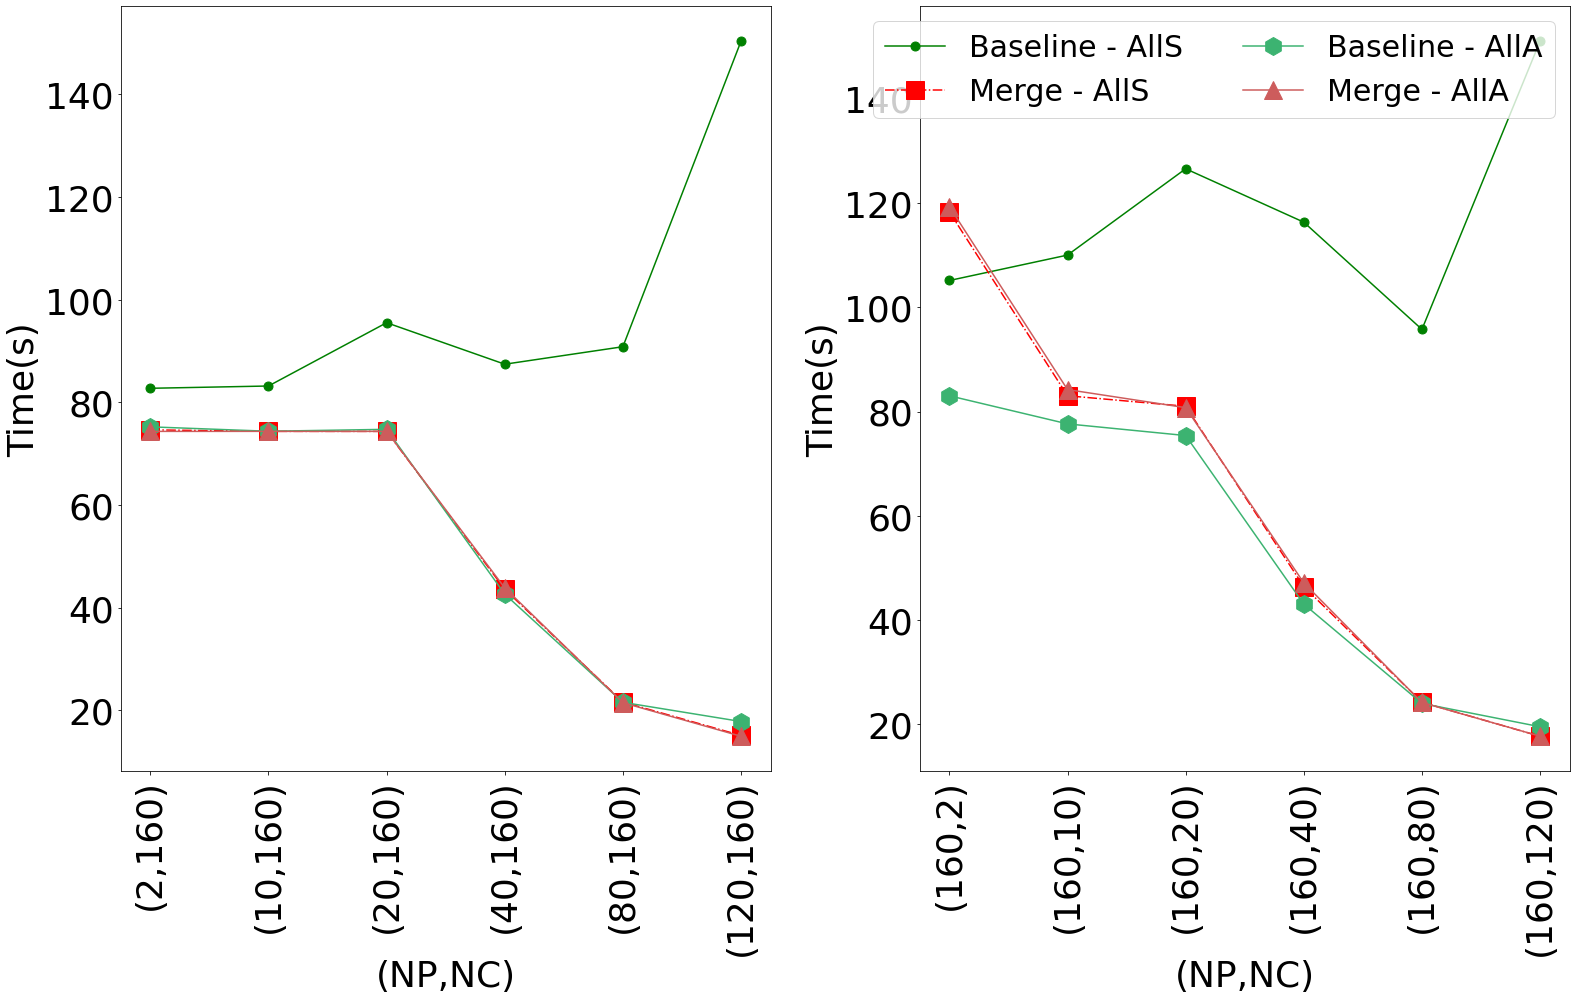

In [30]:


plot_data_e = [b1_aux, m1_aux, b2_aux, m2_aux] #Expand
plot_data_s = [b3_aux, m3_aux, b4_aux, m4_aux] #Shrink

labels_aux_e = create_labels_lineplot('e', lambda a, b: a == 160 or b == 160)
labels_aux_s = create_labels_lineplot('s', lambda a, b: a == 160 or b == 160)
#labels_aux = create_labels_lineplot(used_direction)

labelsMethods_aux = ['Baseline - AllS', 'Merge - AllS',
                     'Baseline - AllA','Merge - AllA']

#labelsMethods_aux = ['Baseline - All', 'Baseline - P2P','Merge - All','Merge - P2P']

f, (axe, axs)=plt.subplots(1,2,figsize=(22, 14))
x = np.arange(len(labels_aux_e))
for index in range(len(plot_data_e)):
    array_aux_e = plot_data_e[index]
    array_aux_s = plot_data_s[index]
    plot_index = index
    if index > 0:
        plot_index = 2**plot_index
    print(array_aux_e)
    axe.plot(x, array_aux_e, color=colors_m[plot_index%len(colors_m)], linestyle=linestyle_m[plot_index%len(linestyle_m)], \
        marker=markers_m[plot_index%len(markers_m)], markersize=18, label=labelsMethods_aux[index])
    axs.plot(x, array_aux_s, color=colors_m[plot_index%len(colors_m)], linestyle=linestyle_m[plot_index%len(linestyle_m)], \
        marker=markers_m[plot_index%len(markers_m)], markersize=18, label=labelsMethods_aux[index])

axe.set_xlabel("(NP,NC)", fontsize=36)
axe.set_ylabel("Time(s)", fontsize=36)
axe.set_xticks(x)
axe.set_xticklabels(labels_aux_e, rotation=90)
axe.tick_params(axis='both', which='major', labelsize=36)
axe.tick_params(axis='both', which='minor', labelsize=36)

axs.set_xlabel("(NP,NC)", fontsize=36)
axs.set_ylabel("Time(s)", fontsize=36)
axs.set_xticks(x)
axs.set_xticklabels(labels_aux_s, rotation=90)
axs.tick_params(axis='both', which='major', labelsize=36)
axs.tick_params(axis='both', which='minor', labelsize=36)

plt.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)
        
f.tight_layout()
f.savefig("Images/LinePlot_100Gb.png", format="png")